# Week3 LAB / HW

## 1. Multinomial Naive Bayes

In [1]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

For simplicity, we will select just a few of these categories, and download the training and testing set. 

In [3]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [4]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())


With this pipeline, we can apply the model to the training data, and predict labels for the test data

In [6]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Confusion matrix between the true and predicted labels for the test data

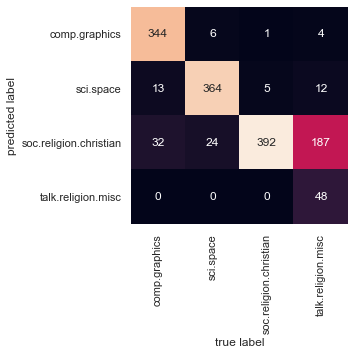

In [7]:
#confusion matrix를 통해 정확도 시각화
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Evidently, even this very simple classifier can successfully separate space talk from computer talk, but it gets confused between talk about religion and talk about Christianity. This is perhaps an expected area of confusion!

In [8]:
#글을 넣었을 때 특정 카테고리로 분류하는 함수 생성
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [9]:
predict_category('sending a payload to the ISS')

'sci.space'

In [10]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [11]:
predict_category('determining the screen resolution')

'comp.graphics'

# 2. Wine Classification

# 1) EDA

In [12]:
import pandas as pd
wine = pd.read_csv("Wine.csv", header=None)
wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Column name을 kaggle을 참고해서 수정

In [13]:
wine.columns=["class","alc","acid","ash","alcal_of_ash","mag","phe","fla","nonfla_phe","proanthoc","col","hue","od285/od315","proline"]
wine.head()

,class,alc,acid,ash,alcal_of_ash,mag,phe,fla,nonfla_phe,proanthoc,col,hue,od285/od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [14]:
#결측치 포함 여부 확인
wine.isnull().sum()

class           0
alc             0
acid            0
ash             0
alcal_of_ash    0
mag             0
phe             0
fla             0
nonfla_phe      0
proanthoc       0
col             0
hue             0
od285/od315     0
proline         0
dtype: int64

no NA values! 

In [15]:
wine.describe()

,class,alc,acid,ash,alcal_of_ash,mag,phe,fla,nonfla_phe,proanthoc,col,hue,od285/od315,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [16]:
wine.groupby('class').size()

class
1    59
2    71
3    48
dtype: int64

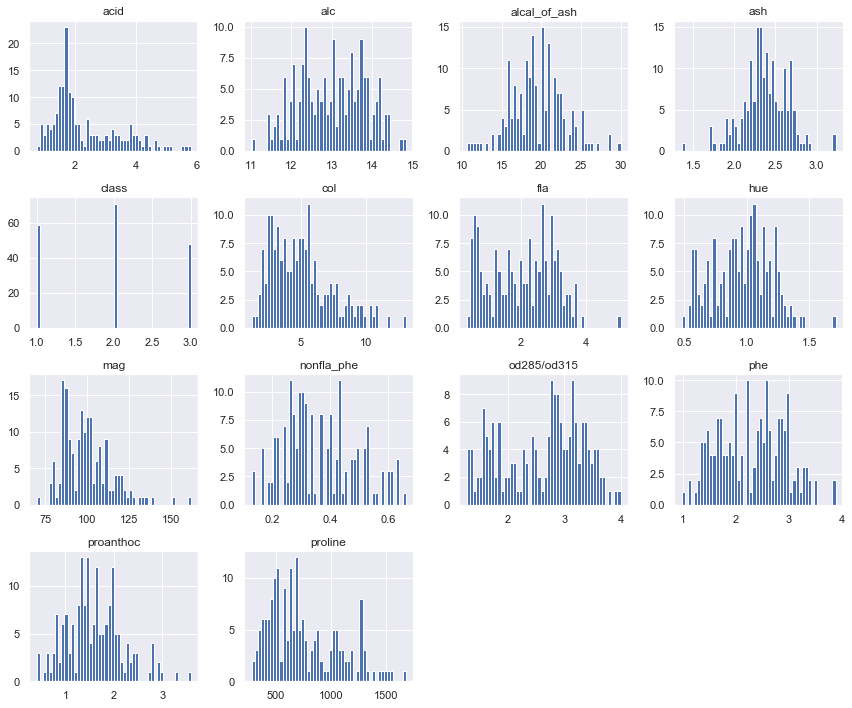

In [17]:
wine.hist(bins=50, figsize=(12,10))
plt.tight_layout()

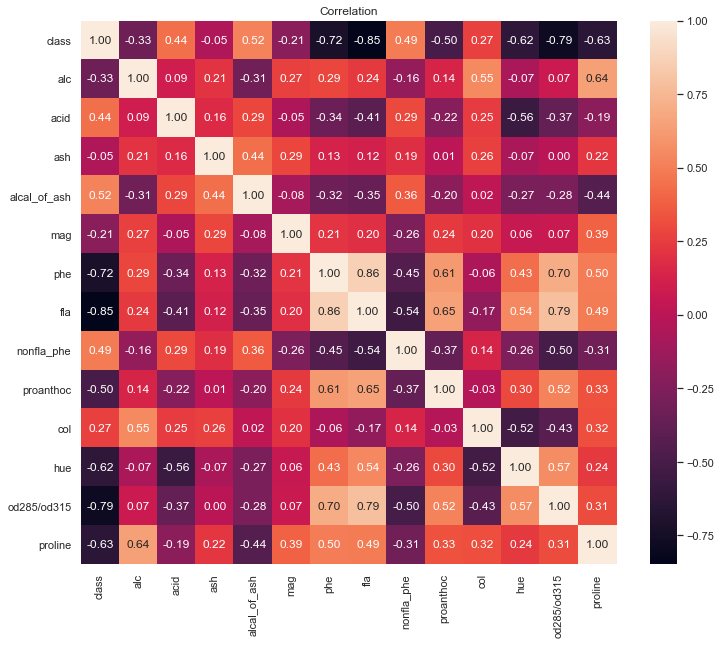

In [18]:
plt.figure(figsize=(12,10))
sns.heatmap(wine.corr(), annot=True, fmt='.2f')
plt.title("Correlation")
plt.show()

class 와 가장 상관관계 높은 2가지 변수: fla, od285/od315

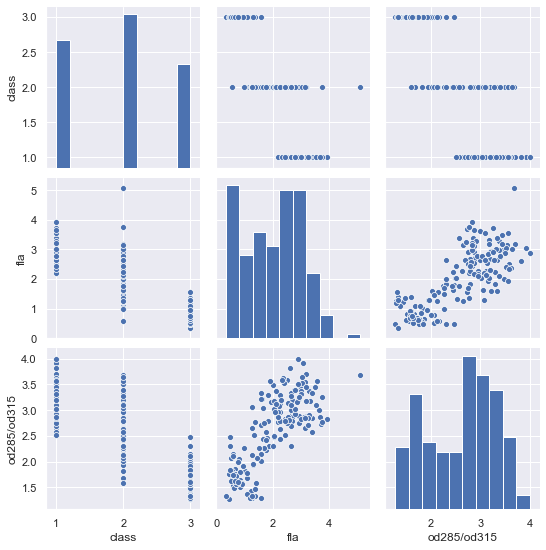

In [19]:
sns.pairplot(wine[['class', 'fla', 'od285/od315']])

Flavonoids('fla') 변수가 outlier가 포함돼있으나, 분산이 작아보임

In [20]:
#나머지 변수들 제외 
wine.drop(wine.columns[[1,2,3,4,5,6,8,9,10,11,13]], axis='columns', inplace=True)
#outlier 제외
wine = wine[wine.fla < 4.5]

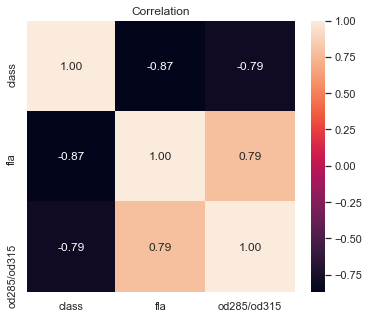

In [21]:
plt.figure(figsize=(6,5))
sns.heatmap(wine.corr(), annot=True, fmt='.2f')
plt.title("Correlation")
plt.show()

## 2) Train-Test Split

In [22]:
X = wine[['fla', 'od285/od315']]
Y = wine[['class']]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(123, 2)
(54, 2)
(123, 1)
(54, 1)


## 3) LDA / QDA

#### LDA: p(x|Ck)=N(μk,Σ) 즉, class-conditional density를 같은 covariance matrix를 갖는 multivariate normal distribution을 따른다고 가정
#### QDA: LDA와 비슷하나 μk , Σk 모두 다르다고 가정 / 범주마다 covariance matrix를 다 추정해야 하므로 추정할 모수가 많음 

### 3)-a. LDA

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import mean_squared_error as mse
lda = LinearDiscriminantAnalysis().fit(X_train, Y_train.values.ravel())

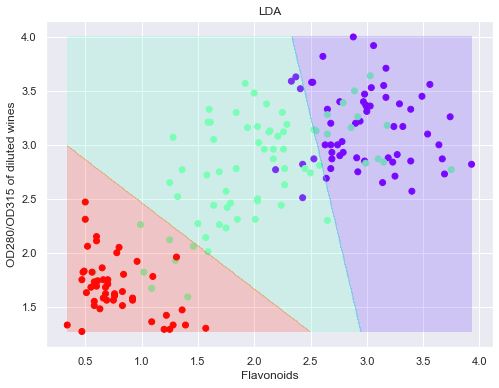

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(data = wine, x = 'fla', y = 'od285/od315', c = 'class', cmap=plt.cm.rainbow)
plt.title('LDA')
plt.xlabel('Flavonoids')
plt.ylabel('OD280/OD315 of diluted wines')

grid_size = 500
A, B = np.meshgrid(np.linspace(X['fla'].min(), X['fla'].max(), grid_size),
                   np.linspace(X['od285/od315'].min(), X['od285/od315'].max(), grid_size))
C = lda.predict( np.hstack([A.reshape(-1, 1), B.reshape(-1, 1)]) ).reshape(grid_size, grid_size)
plt.contourf(A, B, C, alpha=0.2, cmap=plt.cm.rainbow)

참고: https://frhyme.github.io/python-lib/plot_decision_boundary/ / https://datascienceschool.net/view-notebook/6706f10f452a4d2e8095942f6e9def15/

In [25]:
lda_train_mse = mse(Y_train, lda.predict(X_train))
lda_test_mse = mse(Y_test, lda.predict(X_test))
print('LDA train mse :', lda_train_mse);
print('LDA test mse :', lda_test_mse);
print('LDA train score:', lda.score(X_train, Y_train));
print('LDA test score:', lda.score(X_test, Y_test))

LDA train mse : 0.17886178861788618
LDA test mse : 0.12962962962962962
LDA train score: 0.8211382113821138
LDA test score: 0.8703703703703703


### 3)-b. QDA

In [26]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis().fit(X_train, Y_train.values.ravel())

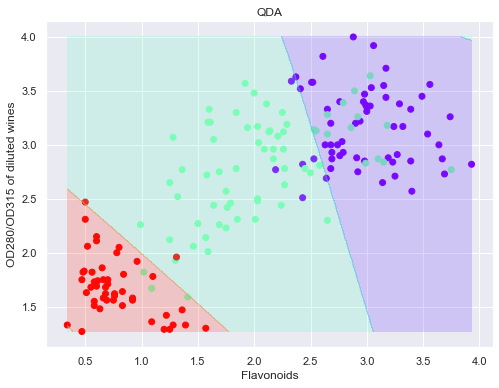

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(data = wine, x = 'fla', y = 'od285/od315', c = 'class', cmap=plt.cm.rainbow)
plt.title('QDA')
plt.xlabel('Flavonoids')
plt.ylabel('OD280/OD315 of diluted wines')

grid_size = 500
A, B = np.meshgrid(np.linspace(X['fla'].min(), X['fla'].max(), grid_size),
                   np.linspace(X['od285/od315'].min(), X['od285/od315'].max(), grid_size))
C = qda.predict( np.hstack([A.reshape(-1, 1), B.reshape(-1, 1)]) ).reshape(grid_size, grid_size)
plt.contourf(A, B, C, alpha=0.2, cmap=plt.cm.rainbow)

왜 decision boundary가 곡선 형태가 아닌 직선으로 나오는 건지는 이유를 모르겠다...

In [28]:
qda_train_mse = mse(Y_train, qda.predict(X_train))
qda_test_mse = mse(Y_test, qda.predict(X_test))
print('QDA train mse :', qda_train_mse);
print('QDA test mse :', qda_test_mse);
print('QDA train score:', qda.score(X_train, Y_train));
print('QDA test score:', qda.score(X_test, Y_test))

QDA train mse : 0.14634146341463414
QDA test mse : 0.14814814814814814
QDA train score: 0.8536585365853658
QDA test score: 0.8518518518518519


## 4) Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(solver='sag', max_iter=10000, multi_class='auto').fit(X_train, Y_train.values.ravel())

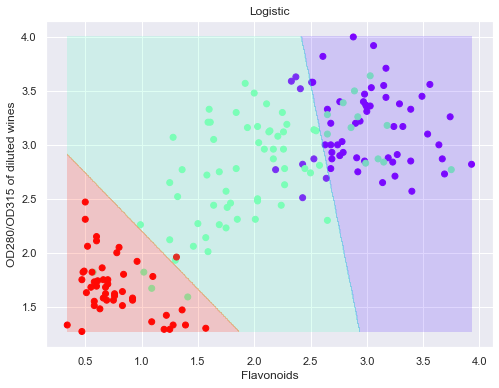

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(data = wine, x = 'fla', y = 'od285/od315', c = 'class', cmap=plt.cm.rainbow)
plt.title('Logistic')
plt.xlabel('Flavonoids')
plt.ylabel('OD280/OD315 of diluted wines')

grid_size = 500
A, B = np.meshgrid(np.linspace(X['fla'].min(), X['fla'].max(), grid_size),
                   np.linspace(X['od285/od315'].min(), X['od285/od315'].max(), grid_size))
C = logistic.predict( np.hstack([A.reshape(-1, 1), B.reshape(-1, 1)]) ).reshape(grid_size, grid_size)
plt.contourf(A, B, C, alpha=0.2, cmap=plt.cm.rainbow)

In [31]:
logistic_train_mse = mse(Y_train, logistic.predict(X_train))
logistic_test_mse = mse(Y_test, logistic.predict(X_test))
print('Logistic train mse:', logistic_train_mse); 
print('Logistic test mse:', logistic_test_mse);
print('Logistic train score:', logistic.score(X_train, Y_train));
print('Logistic test score:', logistic.score(X_test, Y_test))

Logistic train mse: 0.14634146341463414
Logistic test mse: 0.12962962962962962
Logistic train score: 0.8536585365853658
Logistic test score: 0.8703703703703703


## 5) Logistic Regression with Feature Expansion

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
log = LogisticRegression(solver = 'sag', max_iter= 10000, multi_class= "auto")

for i in range(1,7):
    poly = PolynomialFeatures(degree=i, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)
    logistic2 = log.fit(X_train_poly, Y_train.values.ravel())
    print('degree', i, ':', logistic2.score(X_train_poly, Y_train.values.ravel()), logistic2.score(X_test_poly, Y_test.values.ravel()))

degree 1 : 0.8536585365853658 0.8703703703703703
degree 2 : 0.8455284552845529 0.8703703703703703
degree 3 : 0.8617886178861789 0.8518518518518519
degree 4 : 0.8699186991869918 0.8518518518518519
degree 5 : 0.8699186991869918 0.8148148148148148
degree 6 : 0.8617886178861789 0.7962962962962963


4, 5차에서 train score가 가장 높지만, test score는 1차에서 가장 높음 (Feature Expansion의 효과가 크지 않다)

## 6) Test MSE 비교 

In [33]:
print('LDA test MSE:', lda_test_mse)
print('QDA test MSE:', qda_test_mse)
print('Logistic test mse:', logistic_test_mse)

LDA test MSE: 0.12962962962962962
QDA test MSE: 0.14814814814814814
Logistic test mse: 0.12962962962962962


In [34]:
print('LDA train MSE:', lda_train_mse)
print('Logistic train mse:', logistic_train_mse)

LDA train MSE: 0.17886178861788618
Logistic train mse: 0.14634146341463414


#### Test MSE가 낮은 LDA와 Logistic 중에서 train MSE가 더 낮은 Logistic 선택